In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Spotify Data Analysis

The datasets we are using are from a kaggle set that uses the Spotify API to query song data. https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [146]:
df = pd.read_csv("archive/data.csv")
df_artists = pd.read_csv("archive/data_by_artist.csv")
df_genres = pd.read_csv("archive/data_by_genres.csv")
df_year = pd.read_csv("archive/data_by_year.csv")
df_w_genres = pd.read_csv("archive/data_w_genres.csv")

In [147]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


Most of the other datasets are aggregations of this one.  The genre data is the only one that presents information that is not found in this dataset, and it provides aggregations of the data at the genre level or includes what genres an artist encapsualtes. 

In [148]:
df_artists.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9


In [149]:
df_genres.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [150]:
df_w_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


In [151]:
df_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1
3,1924,0.935575,0.548654,188461.649789,0.347033,0.583955,0.237875,-14.202304,0.090210,120.653359,0.668574,0.603376,10,1
4,1925,0.965422,0.571890,184130.699620,0.264373,0.408893,0.243094,-14.516707,0.115457,115.671715,0.616430,2.707224,5,1


In [152]:
df.groupby("year").mean().head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
year,,,,,,,,,,,,,,
1921,0.895823,0.425661,229911.914062,0.236784,0.054688,0.322330,5.031250,0.215814,-17.095438,0.656250,0.351562,0.077258,100.397758,0.425495
1922,0.939236,0.480000,167904.541667,0.237026,0.000000,0.440470,5.236111,0.238647,-19.179958,0.625000,0.138889,0.115419,101.376139,0.534056
1923,0.976329,0.568462,178356.301775,0.246936,0.000000,0.401932,4.846154,0.236656,-14.373882,0.775148,5.727811,0.098619,112.456598,0.624788
1924,0.935575,0.548654,188461.649789,0.347033,0.000000,0.583955,5.637131,0.237875,-14.202304,0.751055,0.603376,0.090210,120.653359,0.668574
1925,0.965422,0.571890,184130.699620,0.264373,0.000000,0.408893,5.171103,0.243094,-14.516707,0.718631,2.707224,0.115457,115.671715,0.616430


The columns in this dataset mostly go over technical muscial information, more detail can be found at this link: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

This link contains a detailed description of the popularity variable
https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/

## EDA 

Problem Statement Idea: 
* Can we extract genre from the various musical features at the song level, using an unsupervised learning technique? 
    - most likely learn genre via clustering, K-means or GMM?


In [153]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

Null value check, perhaps we aren't accounting for the way this data represents null values, i.e. empty brackets, zero values, certain text strings 

First off, how does spotify define genre? Let's take a look at how many genres they define genre in their aggregate dataset

In [154]:
unique_genres = df_genres["genres"].unique()
print(len(unique_genres))
unique_genres[:20]

2664


array(['432hz', '[]', 'a cappella', 'abstract', 'abstract beats',
       'abstract hip hop', 'accordeon', 'accordion', 'acid house',
       'acid jazz', 'acid rock', 'acid trance', 'acousmatic',
       'acoustic blues', 'acoustic pop', 'acoustic punk', 'adoracion',
       'adult standards', 'adventista', 'afghan pop'], dtype=object)

In [155]:
df_w_genres[df_w_genres["genres"] == "[]"].head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]
5,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.609556,0.487278,205091.944444,0.309906,0.004696,0.274767,-18.266389,0.098022,118.648944,0.441556,34.166667,5,1,36,[]


In [156]:
df_w_genres[df_w_genres["genres"] == "[]"].loc[56]

artists             2 Hyped Brothers & A Dog
acousticness                          0.0782
danceability                           0.906
duration_ms                           338533
energy                                 0.382
instrumentalness                    3.21e-05
liveness                               0.113
loudness                             -13.632
speechiness                            0.282
tempo                                126.073
valence                                 0.63
popularity                                27
key                                        9
mode                                       0
count                                      2
genres                                    []
Name: 56, dtype: object

In trying to query our favorite artists from the song data, we noticed an interesting issue with how the artists are represented.

There are 2,664 genres which is a very large amount, we see that there are multiple genres that have an "acid" prefix.  Likely we will cluster and assign our own intuitive genres to each cluster or try to reduce this genre layer down to something we could use for supervised learning. 

We also see that there is an empty value for genre indicated by '[]', so we know that null values are indicated in this dataset beyond an 'na' 

Through this, we determined that the non-numeric variables are stored as strings (even though some appear to be lists, this comes from later EDA). This means we will have to do some preprocessing if we want to use pandas functions to query to through them.

In [157]:
print(type(df["artists"][0]))
df["artists"]

<class 'str'>


0                              ['Carl Woitschach']
1         ['Robert Schumann', 'Vladimir Horowitz']
2                          ['Seweryn Goszczyński']
3                             ['Francisco Canaro']
4         ['Frédéric Chopin', 'Vladimir Horowitz']
                            ...                   
169904                      ['DripReport', 'Tyga']
169905          ['Leon Bridges', 'Terrace Martin']
169906                       ['Kygo', 'Oh Wonder']
169907               ['Cash Cash', 'Andy Grammer']
169908                          ['Ingrid Andress']
Name: artists, Length: 169909, dtype: object

In [158]:
df["artists"] = df["artists"].apply(lambda x: x.replace("'", "").strip('][').split(', '))

In [159]:
type(df["artists"][0])

list

In [160]:
def query_artist(artist):
    return [True if df["artists"][i] == [artist] else False for i in range(len(df["artists"]))]

In [161]:
df[query_artist("MGMT")].sort_values("popularity", ascending = False).head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
86641,0.071400,[MGMT],0.763,229640,0.807,0,3FtYbEfBqAlGO46NUDQSAt,0.280000,1,0.348,-3.714,1,Electric Feel,78,2007-12-14,0.0350,103.038,0.559,2007
86646,0.000760,[MGMT],0.451,302840,0.931,0,1jJci4qxiYcOHhQR247rEU,0.004900,9,0.361,-3.871,1,Kids,78,2007-12-14,0.0719,122.961,0.172,2007
86678,0.000087,[MGMT],0.438,261000,0.940,1,4iG2gAwKXsOcijVaVXzRPW,0.077700,2,0.300,-3.249,1,Time to Pretend,71,2007-12-14,0.0452,100.990,0.421,2007
169614,0.094600,[MGMT],0.645,263880,0.938,1,3td69vL9Py7Ai9wfXYnvji,0.022600,11,0.159,-4.557,0,When You Die,68,2018-02-09,0.0391,140.886,0.495,2018
47785,0.010200,[MGMT],0.705,299960,0.712,0,2Y0iGXY6m6immVb2ktbseM,0.000855,6,0.100,-6.156,1,Little Dark Age,65,2018-02-09,0.0385,97.512,0.620,2018


Text(0.5,1,'Top 10 Most Popular Artists')

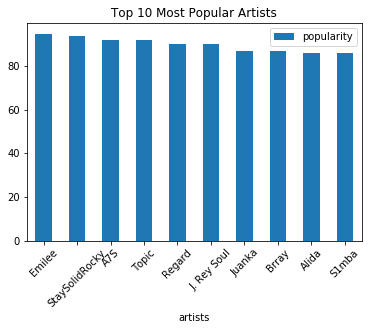

In [174]:
top10_artists = df_artists.sort_values("popularity", ascending = False).head(10)
# artist = top10_artists["artists"]
# artists_pop = top10_artists["popularity"]
# plt.bar(artist, artists_pop)
top10_artists.plot.bar("artists", "popularity")
plt.xticks(rotation= 45)
plt.title("Top 10 Most Popular Artists")

Looking to the popularity of artists in the dataset we see that the top 10 artists are relatively unknown artists (at least to us). Why could that be?

In [163]:
top10_artists

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
7176,Emilee,0.0686,0.674,176547.0,0.774,0.001880,0.3930,-7.567,0.0892,112.050,0.330,95.0,11,0,2
22417,StaySolidRocky,0.7490,0.728,147800.0,0.431,0.000000,0.0996,-9.966,0.0622,130.022,0.629,94.0,6,0,2
216,A7S,0.2230,0.789,166794.0,0.720,0.000000,0.1290,-5.652,0.2180,122.031,0.664,92.0,8,0,2
25318,Topic,0.2230,0.789,166794.0,0.720,0.000000,0.1290,-5.652,0.2180,122.031,0.664,92.0,8,0,1
19891,Regard,0.1770,0.880,157606.0,0.751,0.000064,0.1060,-4.258,0.0874,117.948,0.884,90.0,7,0,2
10612,J. Rey Soul,0.1930,0.894,249143.0,0.635,0.001050,0.0823,-6.929,0.0473,105.013,0.428,90.0,2,1,2
12348,Juanka,0.3000,0.815,345241.0,0.715,0.000005,0.0910,-4.650,0.2070,176.007,0.786,87.0,4,0,2
3353,Brray,0.3000,0.815,345241.0,0.715,0.000005,0.0910,-4.650,0.2070,176.007,0.786,87.0,4,0,1
830,Alida,0.1770,0.570,208222.0,0.672,0.000000,0.0768,-5.890,0.0723,120.019,0.448,86.0,8,0,2
20897,S1mba,0.4960,0.613,167917.0,0.624,0.000000,0.2830,-6.660,0.2060,62.948,0.804,86.0,11,0,1


We see that the count value for these artists are extremely low, so likely these artists are "one-hit wonders" or have 2 very successful songs.  Let's see how popularity measures for a universally loved artist like The Beatles

In [164]:
df_artists[df_artists["artists"] == "The Beatles"]

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
23445,The Beatles,0.360356,0.521975,174307.869988,0.546827,0.051906,0.223001,-9.682696,0.053395,121.074746,0.61966,48.060753,0,1,823


Interestingly, The Beatles have a popularity score of 48.06 compared to the above artists scores of 86-95. How does Spotify measure popularity? Let's look to the API

The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.



So likely the Beatles score is averaged over all their songs, lowering their score as there is a count of 823. It is also interesting that popularity is affected by how recent a song has been played.  Let's see how time affects popularity.

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5,1,'Popularity Over Time')

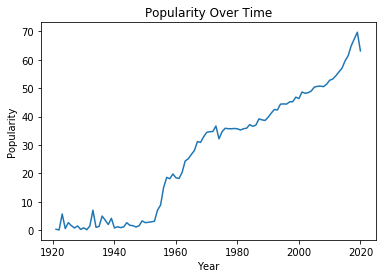

In [165]:
plt.plot(df_year['year'], df_year['popularity'])
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.title("Popularity Over Time")

As we suspected popularity shows an increase over time, favoring more recent songs.  This indicates that popularity is more better defined as "current popularity".  Thus, the variable does not indicate how popular a song was when it came out, rather how popular a song was when the data was queried, roughly October, 11th 2020.  This means it may not be a reliable variable to use, or we must use it acknowleding that it is not a measure of how popular an artist or song has been historically, rather currently.

Let's look at the most popular songs in the dataset as a sanity check

In [166]:
df.sort_values("popularity", ascending = False).head(20)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,[The Weeknd],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020
87940,0.24700,"[DaBaby, Roddy Ricch]",0.746,181733,0.690,1,7ytR5pFWmSjzHJIeQkgog4,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020
87949,0.73100,"[Powfu, beabadoobee]",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020
87941,0.23300,"[THE SCOTTS, Travis Scott, Kid Cudi]",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020
87852,0.06860,"[Surf Mesa, Emilee]",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019
87946,0.32100,[Drake],0.834,247059,0.454,1,127QTOFJsJQp5LbJbu3A1y,0.000006,1,0.1140,-9.750,0,Toosie Slide,95,2020-04-03,0.2010,81.618,0.837,2020
87840,0.10400,[Roddy Ricch],0.896,196653,0.586,1,0nbXyq5TXYPCO7pr3N8S4I,0.000000,10,0.7900,-6.687,0,The Box,95,2019-12-06,0.0559,116.971,0.642,2019
87844,0.30500,"[BENEE, Gus Dapperton]",0.863,223480,0.631,1,4nK5YrxbMGZstTLbvj6Gxw,0.000030,7,0.1230,-4.689,1,Supalonely,95,2019-11-15,0.0534,128.977,0.817,2019
87943,0.74900,[StaySolidRocky],0.728,147800,0.431,0,5RqR4ZCCKJDcBLIn4sih9l,0.000000,6,0.0996,-9.966,0,Party Girl,94,2020-04-21,0.0622,130.022,0.629,2020
87951,0.02640,[6ix9ine],0.611,132303,0.688,1,4NhDYoQTYCdWHTvlbGVgwo,0.000000,1,0.2510,-5.688,1,GOOBA,94,2020-05-08,0.3410,178.462,0.393,2020


These look a lot more like familiar artists. This indicates we want to stick to the song level data as opposed to data aggregated at the artist level so we do not lose detail about the data through issues like the "one-hit wonder" inflation seen above.

It seems that we will want to focus our efforts on clustering the song level data using the technical music aspects to try and discern some innate pattern that we can abstract as genre. Let's look at some of this technical music data and observe.

Text(0,0.5,'Count')

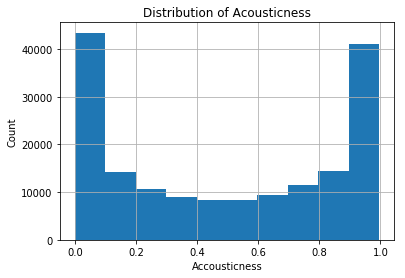

In [167]:
df["acousticness"].hist()
plt.title("Distribution of Acousticness")
plt.xlabel("Accousticness")
plt.ylabel("Count")

Text(0,0.5,'Count')

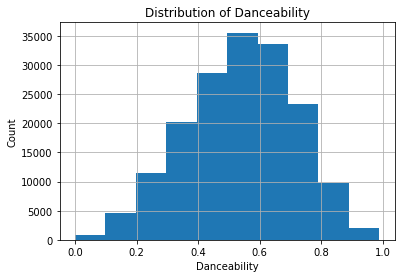

In [168]:
df["danceability"].hist()
plt.title("Distribution of Danceability")
plt.xlabel("Danceability")
plt.ylabel("Count")

We see that the spread for acousticness is heavily concentrated in the 0 and 1 bins, and Danceability is more evenly spread throughout with low concentration in the lower and upper bound bins

We'll use the genre level data to look at trends in the technical music aspects, since it helps us learn how genre behavior trends for these technical music aspects

Text(0,0.5,'Energy')

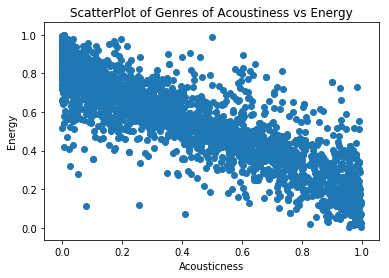

In [169]:
plt.scatter(df_genres["acousticness"], df_genres["energy"])
plt.title("ScatterPlot of Genres of Acoustiness vs Energy")
plt.xlabel("Acousticness")
plt.ylabel("Energy")

Text(0,0.5,'Loudness')

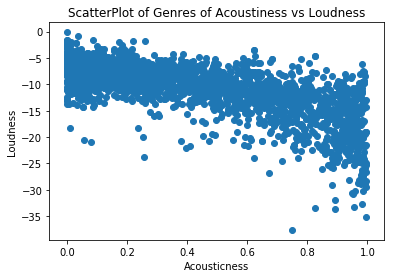

In [170]:
plt.scatter(df_genres["acousticness"], df_genres["loudness"])
plt.title("ScatterPlot of Genres of Acoustiness vs Loudness")
plt.xlabel("Acousticness")
plt.ylabel("Loudness")

Overall, through our EDA we've really decided on trying to cluster for genres at the song level. With multiple other aggregated data sets, we found that we lose specificity from the aggregation so we will choose the raw song data. Perhaps one way that we can measure our success is to compare our song clusters to the genres assigned to artists (though there is no genre variable in the song dataset). 

In [171]:
plotting_cols = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "valence", "speechiness"]
def plot_song(song):
    song_df = df[df["name"] == song]
    song_df.iloc[0][plotting_cols].plot.bar()
    plt.xticks(rotation= 45)
    plt.title("Technical Values of " + song)
    plt.xlabel("Musical Features measured from 0-1")
    plt.ylabel("Value")

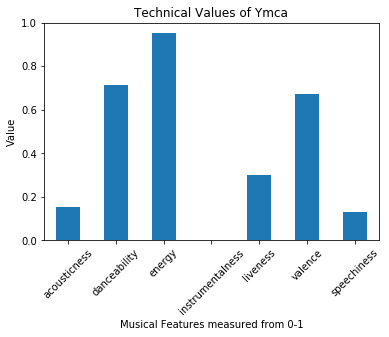

In [172]:
plot_song("Ymca")
